Claude

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def estimate_pi_metropolis_hastings(n_iterations=100000, burn_in=1000):
    """
    Estimate Pi using the Metropolis-Hastings algorithm.
    
    Args:
        n_iterations: Total number of MCMC iterations
        burn_in: Number of initial samples to discard
        
    Returns:
        estimated_pi: The estimated value of Pi
        samples: The accepted samples
        acceptance_rate: Fraction of proposals that were accepted
    """
    # Initialize
    current_point = np.array([0.0, 0.0])  # Start at origin
    samples = np.zeros((n_iterations, 2))
    accepted = 0
    
    # Our target distribution: uniform inside unit circle, zero outside
    def in_unit_circle(point):
        return np.sum(point**2) <= 1.0
    
    # Main MCMC loop
    for i in tqdm(range(n_iterations)):
        # Proposal distribution: random walk with normal distribution
        proposal = current_point + np.random.normal(0, 0.1, size=2)
        
        # Calculate acceptance ratio α
        # Our target is uniform inside circle, so posterior ratio is 1 if both points are in circle
        # (or both outside), and 0 otherwise
        if in_unit_circle(proposal) == in_unit_circle(current_point):
            alpha = 1.0
        elif in_unit_circle(proposal) and not in_unit_circle(current_point):
            alpha = 1.0  # Always accept moves into the circle
        else:
            alpha = 0.0  # Always reject moves out of the circle
        
        # Acceptance-rejection step
        if np.random.random() < alpha:  # Accept with probability alpha
            current_point = proposal
            accepted += 1
            
        # Store the sample
        samples[i] = current_point
        
    # Calculate acceptance rate
    acceptance_rate = accepted / n_iterations
    
    # Discard burn-in samples
    samples = samples[burn_in:]
    
    # Estimate Pi: (points inside circle / total points) * 4
    points_in_circle = np.sum(np.sum(samples**2, axis=1) <= 1.0)
    estimated_pi = 4.0 * points_in_circle / (n_iterations - burn_in)
    
    return estimated_pi, samples, acceptance_rate

def visualize_results(samples, estimated_pi):
    """
    Visualize the MCMC samples and results.
    """
    plt.figure(figsize=(14, 6))
    
    # Plot the samples
    plt.subplot(1, 2, 1)
    circle = plt.Circle((0, 0), 1, fill=False, color='r', linestyle='-')
    square = plt.Rectangle((-1, -1), 2, 2, fill=False, color='b', linestyle='--')
    
    inside_circle = np.sum(samples**2, axis=1) <= 1.0
    plt.scatter(samples[inside_circle, 0], samples[inside_circle, 1], 
                color='red', alpha=0.5, s=1, label='Inside Circle')
    plt.scatter(samples[~inside_circle, 0], samples[~inside_circle, 1], 
                color='blue', alpha=0.5, s=1, label='Outside Circle')
    
    plt.gca().add_patch(circle)
    plt.gca().add_patch(square)
    plt.axis('equal')
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.title('MCMC Samples')
    plt.legend()
    
    # Plot distribution of distances from origin
    plt.subplot(1, 2, 2)
    distances = np.sqrt(np.sum(samples**2, axis=1))
    plt.hist(distances, bins=50, alpha=0.7)
    plt.axvline(x=1.0, color='r', linestyle='--', label='Unit Circle Boundary')
    plt.title(f'Distribution of Distances from Origin\nEstimated π: {estimated_pi:.6f}')
    plt.xlabel('Distance')
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

100%|██████████| 100000/100000 [00:00<00:00, 170015.07it/s]


Estimated π: 4.000000
True π: 3.141593
Error: 0.858407
Acceptance rate: 0.92


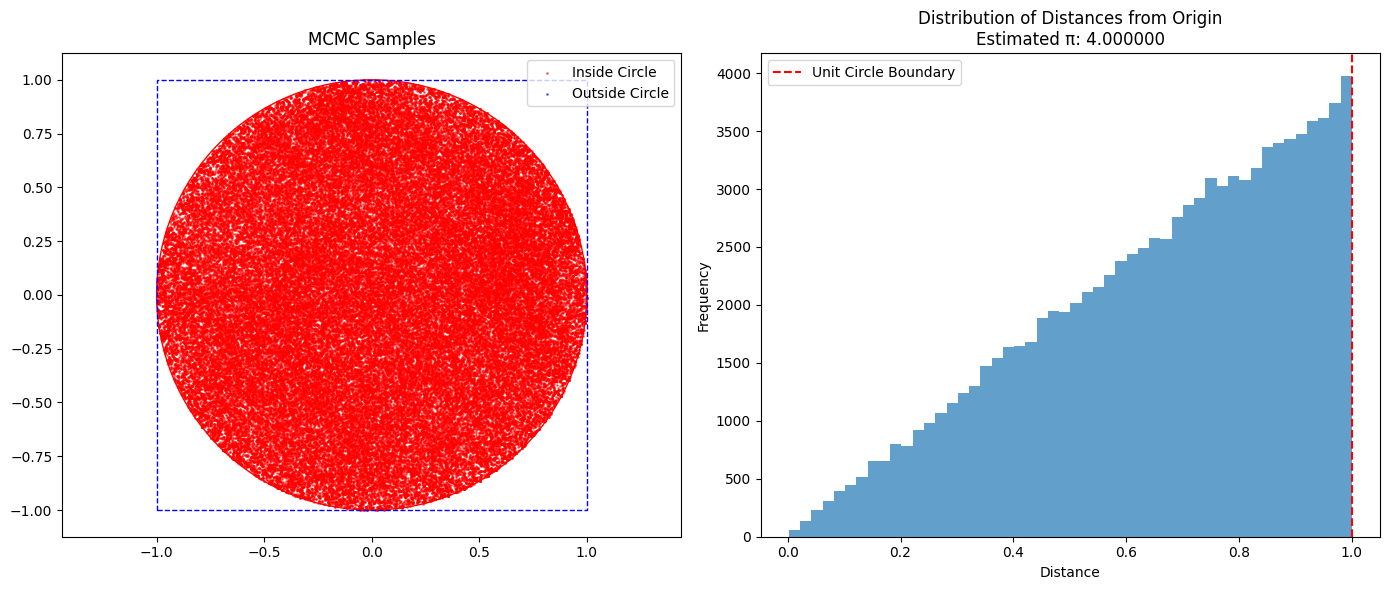

In [2]:
# Run the estimation
n_iterations = 100000
estimated_pi, samples, acceptance_rate = estimate_pi_metropolis_hastings(n_iterations)

print(f"Estimated π: {estimated_pi:.6f}")
print(f"True π: {np.pi:.6f}")
print(f"Error: {abs(estimated_pi - np.pi):.6f}")
print(f"Acceptance rate: {acceptance_rate:.2f}")

# Visualize the results
visualize_results(samples, estimated_pi)